In [30]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import seaborn as sns
import random
import cv2 as cv
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [31]:
DATAPATH = '../input/english-handwritten-characters-dataset'
train_dir = pd.read_csv(DATAPATH + '/english.csv')

In [32]:
rand = random.sample(range(len(train_dir)), 300)
#Create validation set of data
validation_dir = pd.DataFrame(train_dir.iloc[rand,:].values, columns = ['image','label'])
#Drop Validation data from dataset
train_dir.drop(rand, inplace = True)
#Show Validation dataset
validation_dir

,image,label
0,Img/img031-007.png,U
1,Img/img022-029.png,L
2,Img/img059-050.png,w
3,Img/img004-025.png,3
4,Img/img052-042.png,p
...,...,...
295,Img/img026-028.png,P
296,Img/img019-016.png,I
297,Img/img024-052.png,N
298,Img/img015-031.png,E


In [33]:
#Pick randomly 15 values
rand = random.sample(range(len(validation_dir)), 15)
#Create test set of data
test_dir = pd.DataFrame(validation_dir.iloc[rand,:].values, columns = ['image','label'])
#Drop Test data from validation set
validation_dir.drop(rand, inplace = True)
#Show Validation dataset
validation_dir

,image,label
1,Img/img022-029.png,L
2,Img/img059-050.png,w
3,Img/img004-025.png,3
4,Img/img052-042.png,p
5,Img/img046-016.png,j
...,...,...
295,Img/img026-028.png,P
296,Img/img019-016.png,I
297,Img/img024-052.png,N
298,Img/img015-031.png,E


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test2_datagen  = ImageDataGenerator( rescale = 1.0/255. )
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_dataframe( 
                                            dataframe = train_dir, 
                                            directory = DATAPATH,
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = (150,150),
                                            classe_mode = 'categorical')
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_dataframe( 
                                            dataframe = validation_dir, 
                                            directory = DATAPATH,
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = (150,150),
                                            classe_mode = 'categorical')


test_generator =  test2_datagen.flow_from_dataframe( 
                                            dataframe = test_dir, 
                                            directory = DATAPATH,
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = (150,150),
                                            classe_mode = 'categorical')


Found 3110 validated image filenames belonging to 62 classes.
Found 285 validated image filenames belonging to 62 classes.
Found 15 validated image filenames belonging to 13 classes.


In [35]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Organic') 
    # and 1 for the other ('Recycled')
    tf.keras.layers.Dense(62, activation='sigmoid')  
])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

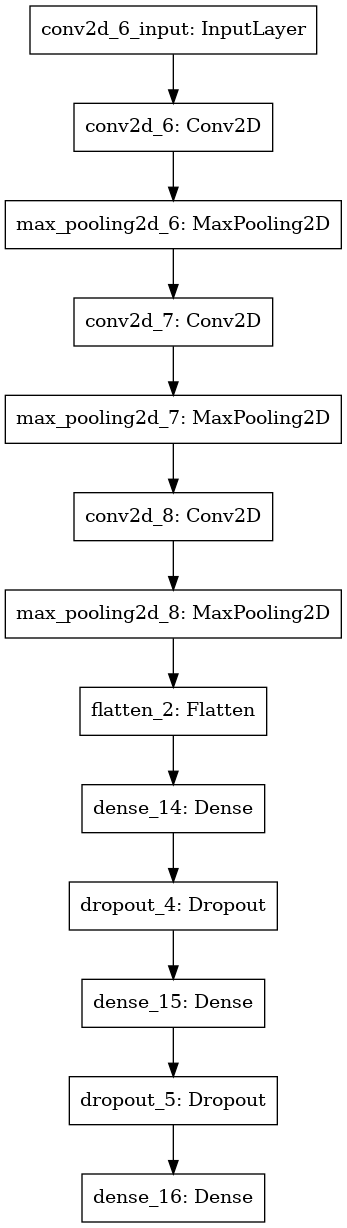

In [37]:
from tensorflow import keras
keras.utils.plot_model(model, "my_cnn_model.png")

In [38]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['acc'])

In [39]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              epochs=40)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
98/98 [==============================] - 84s 851ms/step - loss: 4.7071 - acc: 0.0567 - val_loss: 2.6556 - val_acc: 0.3333
Epoch 2/40
98/98 [==============================] - 72s 732ms/step - loss: 2.2623 - acc: 0.4007 - val_loss: 1.7381 - val_acc: 0.5158
Epoch 3/40
98/98 [==============================] - 72s 731ms/step - loss: 1.2853 - acc: 0.6304 - val_loss: 1.5754 - val_acc: 0.6000
Epoch 4/40
98/98 [==============================] - 72s 731ms/step - loss: 0.7259 - acc: 0.7797 - val_loss: 1.4234 - val_acc: 0.6035
Epoch 5/40
98/98 [==============================] - 72s 731ms/step - loss: 0.4094 - acc: 0.8674 - val_loss: 1.4731 - val_acc: 0.6316
Epoch 6/40
98/98 [==============================] - 72s 728ms/step - loss: 0.2659 - acc: 0.9152 - val_loss: 1.6104 - val_acc: 0.6421
Epoch 7/40
98/98 [==============================] - 72s 729ms/step - loss: 0.1971 - acc: 0.9327 - val_loss: 1.6944 - val_acc: 0.6596
Epoch 8/40
98/98 [==============================] - 71s 726ms/step - 

KeyboardInterrupt: 

In [ ]:
y_prob = model.predict_generator(test_generator)

In [ ]:
cls = []
classes = list(train_generator.class_indices.keys())

In [ ]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [ ]:
cls

# Early stopping

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
monitor = EarlyStopping(monitor='acc', min_delta=1e-3, patience=3, 
                        verbose=1, mode='auto',restore_best_weights=True)
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              epochs=20,
                              verbose=2, callbacks=[monitor])

In [ ]:
y_prob = model.predict_generator(test_generator)

In [ ]:
cls = []
classes = list(train_generator.class_indices.keys())

In [ ]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [ ]:
cls

# InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
from tensorflow.keras import models, layers, optimizers
model_base = InceptionV3(weights='imagenet',include_top=False)

x = model_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512,activation='relu')(x)
predictions = layers.Dense(int(len(train_generator.class_indices.keys())) ,activation='softmax')(x)
InceptionV3_model = models.Model(inputs= model_base.input, outputs=predictions)

In [ ]:
InceptionV3_model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9) ,metrics=['acc'])
history = InceptionV3_model.fit_generator(train_generator, epochs=20, shuffle=True, verbose=1, validation_data=validation_generator)

In [ ]:
y_prob =InceptionV3_model.predict(test_generator,callbacks=[monitor])

In [ ]:
cls = []
classes = list(train_generator.class_indices.keys())

In [ ]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])
   

In [ ]:
cls

# ResNet50-SGD

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
model_base = ResNet50(weights='imagenet',include_top=False)

x = model_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512,activation='relu')(x)
predictions = layers.Dense(int(len(train_generator.class_indices.keys())) ,activation='softmax')(x)
Resnet50_model = models.Model(inputs= model_base.input, outputs=predictions)

In [ ]:
Resnet50_model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9) ,metrics=['acc'])
history = Resnet50_model.fit_generator(train_generator, epochs=20, shuffle=True, verbose=1, validation_data=validation_generator)

In [ ]:
y_prob =Resnet50_model.predict(test_generator,callbacks=[monitor])

In [ ]:
cls = []
classes = list(train_generator.class_indices.keys())

In [ ]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [ ]:
cls

# ResNet50-RMSprop

In [ ]:
Resnet50_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001) ,metrics=['acc'])
history = Resnet50_model.fit_generator(train_generator, epochs=20, shuffle=True, verbose=1, validation_data=validation_generator)

In [ ]:
y_prob =Resnet50_model.predict(test_generator,callbacks=[monitor])

In [ ]:
cls = []
classes = list(train_generator.class_indices.keys())

In [ ]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [ ]:
cls

# MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNet

In [ ]:
model_base = MobileNet(weights='imagenet',include_top=False)

x = model_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512,activation='relu')(x)
predictions = layers.Dense(int(len(train_generator.class_indices.keys())) ,activation='softmax')(x)
MobileNet_model = models.Model(inputs= model_base.input, outputs=predictions)

In [ ]:
MobileNet_model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9) ,metrics=['acc'])
history = MobileNet_model.fit_generator(train_generator, epochs=20, shuffle=True, verbose=1, validation_data=validation_generator)

In [ ]:
y_prob =MobileNet_model.predict(test_generator,callbacks=[monitor])

In [ ]:
cls = []
classes = list(train_generator.class_indices.keys())

In [ ]:
for i in y_prob:
    ar = list(i)
    cls.append(classes[ar.index(max(ar))])

In [ ]:
cls